Empty DataFrame
Columns: [Date, Funds_Rate]
Index: []
Empty DataFrame
Columns: [Date, Close]
Index: []
Empty DataFrame
Columns: [Date, House_Price]
Index: []
Empty DataFrame
Columns: [Date, Bond_Close]
Index: []
Empty DataFrame
Columns: [Date, Gold_Price]
Index: []


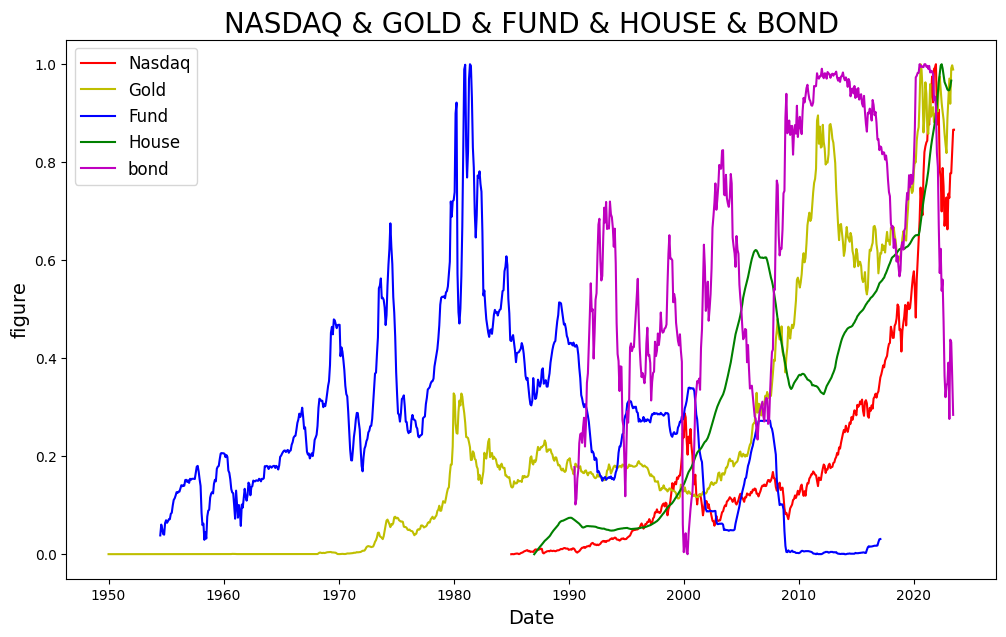

In [1]:
# 날짜 범위 설정은 따로 안한 상태로 날짜 형태랑 컬럼 rename 정도 해준다.
# 데이터들은 결측치 제거를 drop()와 dropna()로 하였고 중복데이터를 duplicated()로 없앴다
# x축은 전체날짜로 .Date 넣은거고 y축은 0~1로 표준화를 해서 넣은거다.
# 날짜 범위 설정은 따로 안한 상태로 이들의 전체 기간을 그래프로 출력하였다.



import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.stats.weightstats import ztest
import numpy as np
from sklearn.preprocessing import MinMaxScaler

matplotlib.matplotlib_fname()

### CSV 파일 불러오기
stock_df = pd.read_csv('C:/Users/user/Desktop/Securities_Data_Analysis(Junsu)/dataset/original_data/나스닥(1985~2023)_yfinance.csv')
gold_df = pd.read_csv('C:/Users/user/Desktop/Securities_Data_Analysis(Junsu)/dataset/original_data/금(1950~2023)_캐글.csv')
fund_df = pd.read_csv('C:/Users/user/Desktop/Securities_Data_Analysis(Junsu)/dataset/original_data/미국 금리(1954~2017)_캐글2.csv')
house_df = pd.read_csv('C:/Users/user/Desktop/Securities_Data_Analysis(Junsu)/dataset/original_data/케이스-쉴러_미국주택가격지수(1987.1~2023.4).csv')
bond_df = pd.read_csv('C:/Users/user/Desktop/Securities_Data_Analysis(Junsu)/dataset/original_data/2년만기 미국채 선물 과거 데이터.csv')

### 불러올 날짜 설정
# stock_df = stock_df[stock_df['Date'].between('1991-01-01', '2022-12-01')] 
# gold_df = gold_df[gold_df['Date'].between('1991-01-01', '2022-12-01')]
# fund_df = fund_df[fund_df['Date'].between('1991-01-01', '2017-01-01')]
# house_df = house_df[house_df['DATE'].between('1991-01-01', '2017-01-01')]

### 불러온 데이터 확인하기
# print(stock_df.head) # 총 행렬 가져오기
# print(gold_df.head)
# print(fund_df.head)
# print(house_df.head)
# print(bond_df.head)

gold_df = gold_df.rename(columns={'Price USD per Oz':'Gold_Price'}) # 컬럼 rename
fund_df = fund_df.rename(columns={'Effective Federal Funds Rate':'Funds_Rate'})
house_df = house_df.rename(columns={'SPCS10RSA':'House_Price', "DATE":"Date"})
bond_df = bond_df.rename(columns={'날짜':'Date', '종가':'Bond_Close'})

# print(df.columns) # 해당 파일의 행렬 개수와 열 이름 확인
# print(df.shape) # (행의 개수, 열의 개수) 출력
# print(df.info()) # 해당 파일 열의 타입과 null행 수 확인
stock_df.loc[:,'Date'] = pd.to_datetime(stock_df.Date) # 날짜를 datatime 형식으로 바꿔준다
gold_df.loc[:,'Date'] = pd.to_datetime(gold_df.Date) # 날짜를 datatime 형식으로 바꿔준다
fund_df.loc[:,'Date'] = pd.to_datetime(fund_df.Date) # 날짜를 datatime 형식으로 바꿔준다
house_df.loc[:,'Date'] = pd.to_datetime(house_df.Date) # 날짜를 datatime 형식으로 바꿔준다
bond_df.loc[:,'Date'] = pd.to_datetime(bond_df.Date) # 날짜를 datatime 형식으로 바꿔준다
# print(df.head)

######------------------------------------------------------- 데이터 전처리 -----------------------------------------------------------unt)


### 결측치 제거
# print(df.isna().sum()) # 데이터의 정합성을 확인한다

# print(df.isnull().sum()) # 컬럼 별 결측치 확인
# print(len(fund_df)-fund_df.count()) # 컬럼 별 결측치 확인
stock_df = stock_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)

fund_df = fund_df.drop(['Year', 'Month', 'Day'], axis=1) # 특정 칼럼(열) 삭제

bond_df = bond_df.drop(['시가', '고가', '저가', '변동 %'], axis = 1)
# print(df[df.isnull().any(axis=1)]) # 결측치가 하나라도 있는 행의 index와 결측치 종류를 알려준다
fund_df = fund_df.dropna(axis=0) # 결측치를 제거하는 함수 how : any/all / subset : 특정 칼럼 선택 / inplace : 데이터프레임에 바로 적용

house_df = house_df.dropna(axis=0)

bond_df = bond_df.dropna(axis=0)


### 결측치 변경
# print(df.loc[[188,191,194]]) # 특정 열을 출력
# df.loc[191, '수출금액'] = (df.loc[188, '수출금액'] + df.loc[194, '수출금액']) / 2 # 특정 행의 값으로 평균,덧셈,뺄셈으로 결측치 보완
# print(df.loc[[191]])

# df.loc[191, '무역수지'] = df.loc[188, '수출금액'] - df.loc[194, '수입금액']
# print(df.loc[[191]])





### 중복데이터
print(fund_df[fund_df.duplicated()]) # 중복이 있는 행들을 찾아 index를 알려줌
print(stock_df[stock_df.duplicated()])
print(house_df[house_df.duplicated()])
print(bond_df[bond_df.duplicated()])
print(gold_df[gold_df.duplicated()])

# df.drop_duplicates(inplace=True) # 중복 행 삭제 후 바로 적용
# print("삭제 완료")
# print(df[df.duplicated()])
# df.drop_duplicates(subset=['id'], keep='last') # 특정 열이 고유한 key를 가지는 경우 중복된 데이터 중 뒤를 남김





### 이상치
# fig, ax = plt.subplots(figsize=(9,6)) # 정규분포를 따르는지 그래프로 확인
# _ = plt.hist(df.Close, 100, density=True, alpha=0.75)
# plt.show()

# _, p = ztest(df.Close) # p가 0.05이하로 나온다면 정규분포와 거리가 멀다는 뜻
# print(p)


# print(stock_df.head) # 총 행렬 가져오기
# print(gold_df.head)
# print(fund_df.head)
# print(house_df.head)
# print(bond_df.head)


#######---------------------------------------- 그래프그리기 ----------------------------------------------------######
### 표준화(0~1)
scaler = MinMaxScaler()

stock_close_df = pd.DataFrame(data=stock_df.Close)
scaler.fit(stock_close_df)
stock_scaled = scaler.transform(stock_close_df)
stock_df_scaled = pd.DataFrame(data=stock_scaled)

gold_close_df = pd.DataFrame(data=gold_df.Gold_Price)
scaler.fit(gold_close_df)
gold_scaled = scaler.transform(gold_close_df)
gold_df_scaled = pd.DataFrame(data=gold_scaled)

fund_close_df = pd.DataFrame(data=fund_df.Funds_Rate)
scaler.fit(fund_close_df)
fund_scaled = scaler.transform(fund_close_df)
fund_df_scaled = pd.DataFrame(data=fund_scaled)

house_close_df = pd.DataFrame(data=house_df.House_Price)
scaler.fit(house_close_df)
house_scaled = scaler.transform(house_close_df)
house_df_scaled = pd.DataFrame(data=house_scaled)

bond_close_df = pd.DataFrame(data=bond_df.Bond_Close)
scaler.fit(bond_close_df)
bond_scaled = scaler.transform(bond_close_df)
bond_df_scaled = pd.DataFrame(data=bond_scaled)

# print('종가들의 정규화 최소 값')
# print(stock_df_scaled.min())
# print('\n종가들의 정규화 최대 값')
# print(stock_df_scaled.max())
# print(stock_df_scaled)

### 주식 그래프 그리기
plt.rcParams["figure.figsize"] = (12,7)
# Line Graph by matplotlib with wide-form DataFrame

plt.plot(stock_df.Date, stock_df_scaled, color='r')
plt.plot(gold_df.Date, gold_df_scaled, color='y')
plt.plot(fund_df.Date, fund_df_scaled, color='b')
plt.plot(house_df.Date, house_df_scaled, color='g')
plt.plot(bond_df.Date, bond_df_scaled, color='m')

# plt.plot(stock_df.Date, stock_df.Close, color='r')
# plt.plot(gold_df.Date, gold_df.Gold_Price, color='y')
# plt.plot(fund_df.Date, fund_df.Funds_Rate, color='b')
# plt.plot(house_df.Date, house_df.House_Price, color='g')
# plt.plot(bond_df.Date, bond_df.Bond_Close, color='m')

plt.title('NASDAQ & GOLD & FUND & HOUSE & BOND', fontsize=20) 
plt.ylabel('figure', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(['Nasdaq', 'Gold', 'Fund', 'House', 'bond'], fontsize=12, loc='best')

plt.show()